In [1]:
import torch 
from torch import nn 
import numpy as np
import argparse
from Dataset import FairytalesDataset
from torch import nn, optim
from torch.utils.data import DataLoader
from train import save_checkpoint, load_checkpoint, train
from models import Lstm_model
from test import predict 
import time
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
def print_results(text, sent_perplexity): 
    print('Generated text:')
    print(' ')
    print(text)
    print(' ')
    print('Number of sentences:', len(sent_perplexity))
    print(' ')
    print('Perplexity per sentence:', sent_perplexity)
    print(' ')
    print('Average sentence perplexity:', sum(sent_perplexity) / len(sent_perplexity))

There are 9 trained models: 

- **Model_1-128**: one-layer model with 128 cells
- **Model_1-256**: one-layer model with 256 cells 
- **model_1-512**: one-layer model with 512 cells 

- **model_2-128**: two-layer model with 128 cells 
- **model_2-256**: two-layer model with 256 cells
- **model_2-512**: two-layer model with 512 cells 

- **model_3-128**: three-layer model with 128 cells 
- **model_3-256**: three-layer model with 256 cells 
- **model_3-512**: three-layer model with 512 cells

# Load dataset

In [3]:
DIR_PATH = "data/fairytales.txt"
START_TOKEN = "<s>"
END_TOKEN = "</s>"
LEARNING_RATE = 0.001

parser = argparse.ArgumentParser()
parser.add_argument('--max-epochs', type=int, default=0)
parser.add_argument('--batch-size', type=int, default=256)
parser.add_argument('--sequence_length', type=int, default=7)
args, unknown = parser.parse_known_args()

dataset = FairytalesDataset(DIR_PATH, START_TOKEN, END_TOKEN, args)
print(dataset.__getitem__(3))
print('Vocab:', len(dataset.unique_words))

(tensor([ 53,   9,  73,   6,  19, 149,  40]), tensor([  9,  73,   6,  19, 149,  40,  93]))
Vocab: 3028


# 1. Load One-Layer Models 

In [4]:
model_1 = Lstm_model(dataset, lstm_size = 128, num_layers = 1)
model_2 = Lstm_model(dataset, lstm_size = 256, num_layers = 1)
model_3 = Lstm_model(dataset, lstm_size = 512, num_layers = 1)

In [5]:
train(dataset, model_1, args, ckpt_filename='one_layer_lstm/128.tar',
      load_model=True, save_epochs=2)
train(dataset, model_2, args, ckpt_filename='one_layer_lstm/256.tar',
      load_model=True, save_epochs=2)
train(dataset, model_3, args, ckpt_filename='one_layer_lstm/512.tar',
      load_model=True, save_epochs=2)

-> Loading checkpoint
-> Loading checkpoint
-> Loading checkpoint


[]

# 2. Load Two-Layer Models 

In [6]:
model_4 = Lstm_model(dataset, lstm_size = 128, num_layers = 2)
model_5 = Lstm_model(dataset, lstm_size = 256, num_layers = 2)
model_6 = Lstm_model(dataset, lstm_size = 512, num_layers = 2)

In [7]:
train(dataset, model_4, args, ckpt_filename='two_layer_lstm/128.tar',
      load_model=True, save_epochs=2)
train(dataset, model_5, args, ckpt_filename='two_layer_lstm/256.tar',
      load_model=True, save_epochs=2)
train(dataset, model_6, args, ckpt_filename='two_layer_lstm/512.tar',
      load_model=True, save_epochs=2)

-> Loading checkpoint
-> Loading checkpoint
-> Loading checkpoint


[]

# 3. Load Multi-Layer Models

In [8]:
model_7 = Lstm_model(dataset, lstm_size = 128, num_layers = 3)
model_8 = Lstm_model(dataset, lstm_size = 256, num_layers = 3)
model_9 = Lstm_model(dataset, lstm_size = 512, num_layers = 3)

In [9]:
train(dataset, model_7, args, ckpt_filename='multi_layer_lstm/128.tar',
      load_model=True, save_epochs=2)
train(dataset, model_8, args, ckpt_filename='multi_layer_lstm/256.tar',
      load_model=True, save_epochs=2)
train(dataset, model_9, args, ckpt_filename='multi_layer_lstm/512.tar',
      load_model=True, save_epochs=2)

-> Loading checkpoint
-> Loading checkpoint
-> Loading checkpoint


[]

# Losses

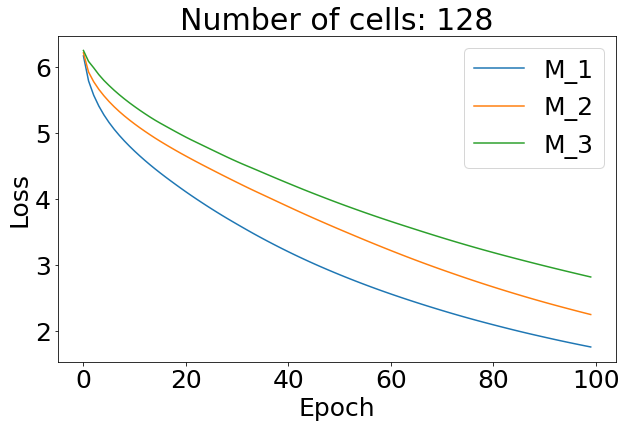

In [93]:
exp1 = torch.load('one_layer_lstm/128.tar')
loss_history1 = exp1["loss_history"]

exp4 = torch.load('two_layer_lstm/128.tar')
loss_history4 = exp4["loss_history"]

exp7 = torch.load('multi_layer_lstm/128.tar')
loss_history7 = exp7["loss_history"]

mpl.rcParams['font.size'] = 25
plt.figure(figsize=(10,6))
plt.plot(range(len(loss_history1)), loss_history1, label="M_1")
plt.plot(range(len(loss_history4)), loss_history4, label="M_2") 
plt.plot(range(len(loss_history7)), loss_history7, label="M_3")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Number of cells: 128")
plt.legend()
plt.savefig("loss_128.jpg", bbox_inches='tight')
plt.show()

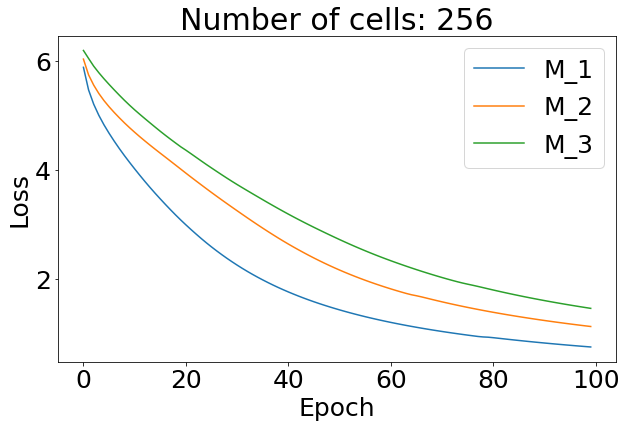

In [94]:
exp2 = torch.load('one_layer_lstm/256.tar')
loss_history2 = exp2["loss_history"]

exp5 = torch.load('two_layer_lstm/256.tar')
loss_history5 = exp5["loss_history"]

exp8 = torch.load('multi_layer_lstm/256.tar')
loss_history8 = exp8["loss_history"]

mpl.rcParams['font.size'] = 25
plt.figure(figsize=(10,6))
plt.plot(range(len(loss_history2)), loss_history2, label="M_1")
plt.plot(range(len(loss_history5)), loss_history5, label="M_2") 
plt.plot(range(len(loss_history8)), loss_history8, label="M_3")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Number of cells: 256")
plt.legend()

plt.savefig("loss_256.jpg", bbox_inches='tight')
plt.show()

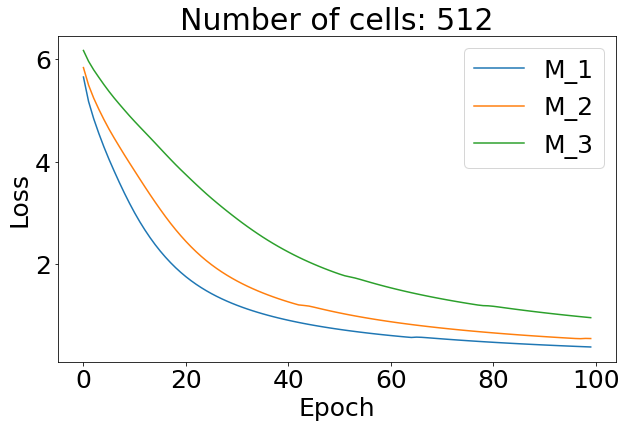

In [90]:
exp3 = torch.load('one_layer_lstm/512.tar')
loss_history3 = exp3["loss_history"]

exp6 = torch.load('two_layer_lstm/512.tar')
loss_history6 = exp6["loss_history"]

exp9 = torch.load('multi_layer_lstm/512.tar')
loss_history9 = exp9["loss_history"]

mpl.rcParams['font.size'] = 25
plt.figure(figsize=(10,6))
plt.plot(range(len(loss_history3)), loss_history3, label="M_1")
plt.plot(range(len(loss_history6)), loss_history6, label="M_2") 
plt.plot(range(len(loss_history9)), loss_history9, label="M_3")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Number of cells: 512")
plt.legend()
plt.savefig("loss_512.jpg", bbox_inches='tight')
plt.show()

# Predictions 

In [77]:
next_words = 100
text = 'once upon a time'

def compute_average(sent_perplexity): 
    return sum(sent_perplexity) / len(sent_perplexity)


In [78]:
# model 1
average_sent_perplexity1 = []
for _ in range(50): 
    _, sent_perplexity = predict(dataset, model_1, text=text, next_words=next_words)
    average_sent_perplexity1.append(compute_average(sent_perplexity))

# model 2
average_sent_perplexity2 = []
for _ in range(50): 
    _, sent_perplexity = predict(dataset, model_2, text=text, next_words=next_words)
    average_sent_perplexity2.append(compute_average(sent_perplexity))

# model 3
average_sent_perplexity3 = []
for _ in range(50): 
    _, sent_perplexity = predict(dataset, model_3, text=text, next_words=next_words)
    average_sent_perplexity3.append(compute_average(sent_perplexity))

In [79]:
# model 4
average_sent_perplexity4 = []
for _ in range(50): 
    _, sent_perplexity = predict(dataset, model_4, text=text, next_words=next_words)
    average_sent_perplexity4.append(compute_average(sent_perplexity))

# model 5
average_sent_perplexity5 = []
for _ in range(50): 
    _, sent_perplexity = predict(dataset, model_5, text=text, next_words=next_words)
    average_sent_perplexity5.append(compute_average(sent_perplexity))
    
# model 6 
average_sent_perplexity6 = []
for _ in range(50): 
    _, sent_perplexity = predict(dataset, model_6, text=text, next_words=next_words)
    average_sent_perplexity6.append(compute_average(sent_perplexity))

In [80]:
# model 7
average_sent_perplexity7 = []
for _ in range(50): 
    _, sent_perplexity = predict(dataset, model_7, text=text, next_words=next_words)
    average_sent_perplexity7.append(compute_average(sent_perplexity))

# model 8
average_sent_perplexity8 = []
for _ in range(50): 
    _, sent_perplexity = predict(dataset, model_8, text=text, next_words=next_words)
    average_sent_perplexity8.append(compute_average(sent_perplexity))
    
# model 9 
average_sent_perplexity9 = []
for _ in range(50): 
    _, sent_perplexity = predict(dataset, model_9, text=text, next_words=next_words)
    average_sent_perplexity9.append(compute_average(sent_perplexity))

In [81]:
data = [
    average_sent_perplexity1, 
    average_sent_perplexity2,
    average_sent_perplexity3,
    average_sent_perplexity4,
    average_sent_perplexity5,
    average_sent_perplexity6,
    average_sent_perplexity7,
    average_sent_perplexity8,
    average_sent_perplexity9
]

#labels=[ 'Model_1-128', 'Model_1-256', 'Model_1-512', 
#        'Model_2-128', 'Model_2-256', 'Model_2-512',
#        'Model_3-128', 'Model_3-256', 'Model_3-512'
#]

labels=[ 'M_1-128', 'M_1-256', 'M_1-512', 
        'M_2-128', 'M_2-256', 'M_2-512',
        'M_3-128', 'M_3-256', 'M_3-512'
]

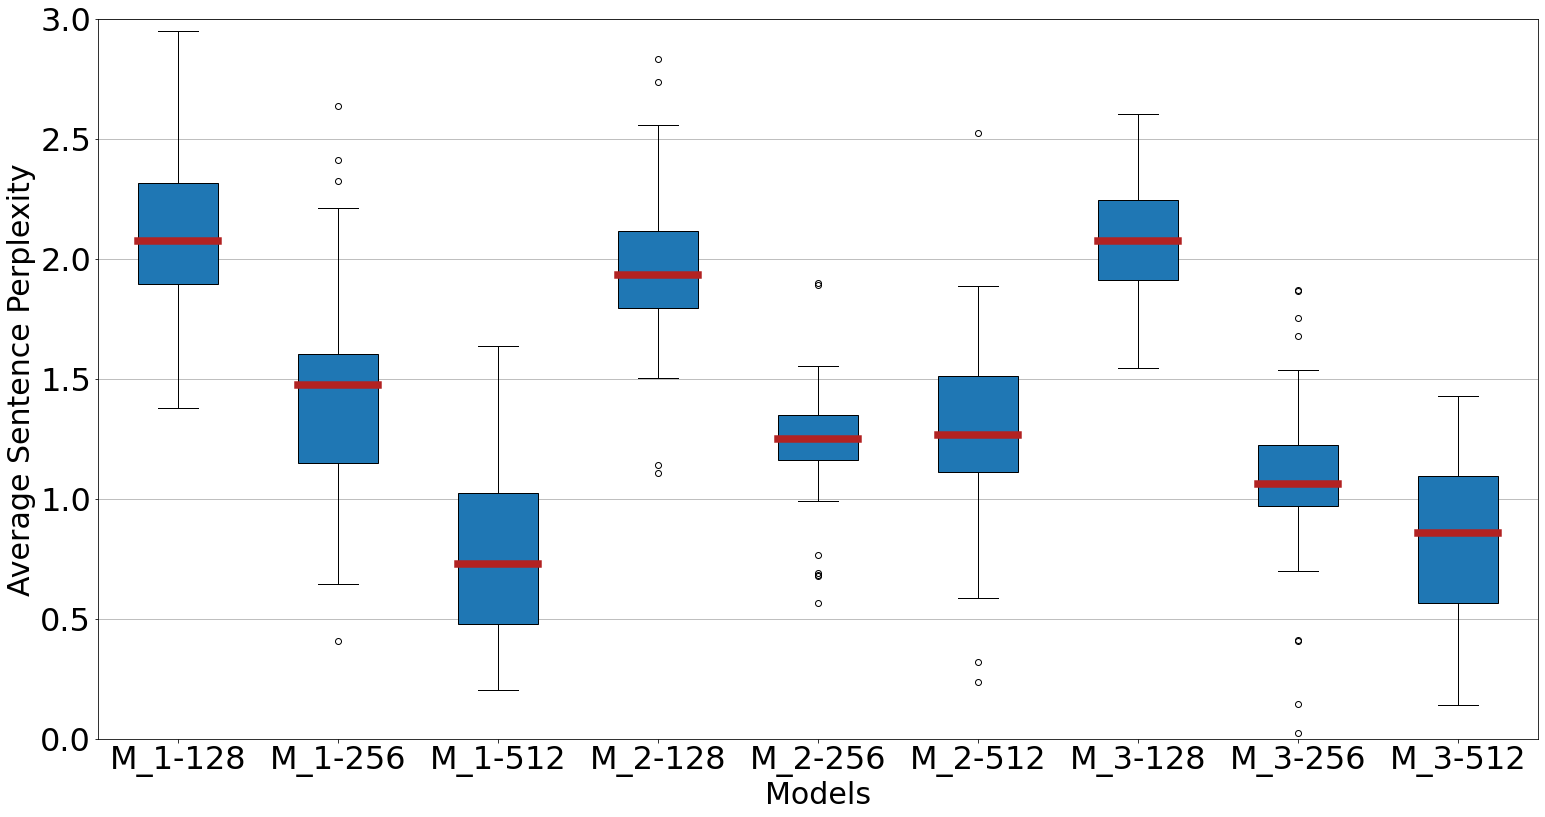

In [95]:
mpl.rcParams['font.size'] = 32
medianprops = dict(linestyle='-', linewidth=7.5, color='firebrick')
#threshold = 1
fig = plt.figure(figsize =(20, 10))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data, patch_artist=True, medianprops=medianprops, labels=labels) 
#ax.axvline(threshold, c = "red", linestyle="--", alpha = 0.5)
ax.set_ylim(0,3)
plt.ylabel('Average Sentence Perplexity', fontsize=30)
plt.xlabel('Models', fontsize=30)
plt.gca().yaxis.grid(True)
plt.savefig("boxplot.jpg", bbox_inches='tight')
plt.show()


In [83]:
import pandas as pd 

d = {
    
    'M_1-128': average_sent_perplexity1, 
    'M_1-256': average_sent_perplexity2, 
    'M_1-512': average_sent_perplexity3,
    'M_2-128': average_sent_perplexity4,
    'M_2-256': average_sent_perplexity5,
    'M_2-512': average_sent_perplexity6,
    'M_3-128': average_sent_perplexity7,
    'M_3-256': average_sent_perplexity8,
    'M_3-512': average_sent_perplexity9,    
    
}

df = pd.DataFrame(data=d)
df.head()

,M_1-128,M_1-256,M_1-512,M_2-128,M_2-256,M_2-512,M_3-128,M_3-256,M_3-512
0,1.776959,1.299274,0.342619,2.099767,1.321446,1.269791,1.964100,1.211520,0.695017
1,1.942538,1.533566,1.638035,1.931723,1.509759,1.021304,2.228150,0.824281,0.139664
2,1.893161,1.505890,0.753097,1.825644,1.164833,1.518678,1.844762,0.767064,1.314915
3,2.948668,1.147605,3.758521,2.555533,1.215843,1.611681,1.806453,0.410637,0.885012
4,1.894290,1.497387,0.598141,2.087381,0.567448,1.339295,1.909026,0.143952,1.230045


In [84]:
model_names = df.columns #names of models

mean = df[model_names].mean()
pp_25per = df[model_names].quantile(q=.25)
pp_75per = df[model_names].quantile(q=.75)
maxPP = df[model_names].max()
minPP = df[model_names].min()
pp_5per = df[model_names].quantile(q=.05)
pp_95per = df[model_names].quantile(q=.95)

In [85]:
data_frames = [mean, pp_25per, pp_75per, maxPP, minPP, pp_5per, pp_95per]
column_names = ['meanPP', 'PP_25per', 'PP_75per', 'maxPP', 'minPP', 'PP_5per', 'PP_95per']
merged_df = pd.concat(data_frames, join='outer', axis=1)
merged_df.columns =column_names

In [86]:
merged_df

,meanPP,PP_25per,PP_75per,maxPP,minPP,PP_5per,PP_95per
M_1-128,2.103447,1.893443,2.317201,2.948668,1.376253,1.587701,2.601138
M_1-256,1.432159,1.150608,1.603611,2.635581,0.407271,0.688979,2.273814
M_1-512,0.809240,0.476715,1.024172,3.758521,0.201286,0.256694,1.479052
M_2-128,1.968932,1.794633,2.117774,2.833417,1.106989,1.530966,2.513478
M_2-256,1.234301,1.161623,1.351132,1.900942,0.567448,0.687420,1.550295
M_2-512,1.278619,1.113077,1.510708,2.522478,0.237133,0.621441,1.759902
M_3-128,2.067131,1.912942,2.246805,2.604500,1.545345,1.621206,2.382122
M_3-256,1.080600,0.968278,1.222487,1.869285,0.025746,0.408229,1.719581
M_3-512,0.812075,0.565129,1.095324,1.427694,0.139664,0.224398,1.267273


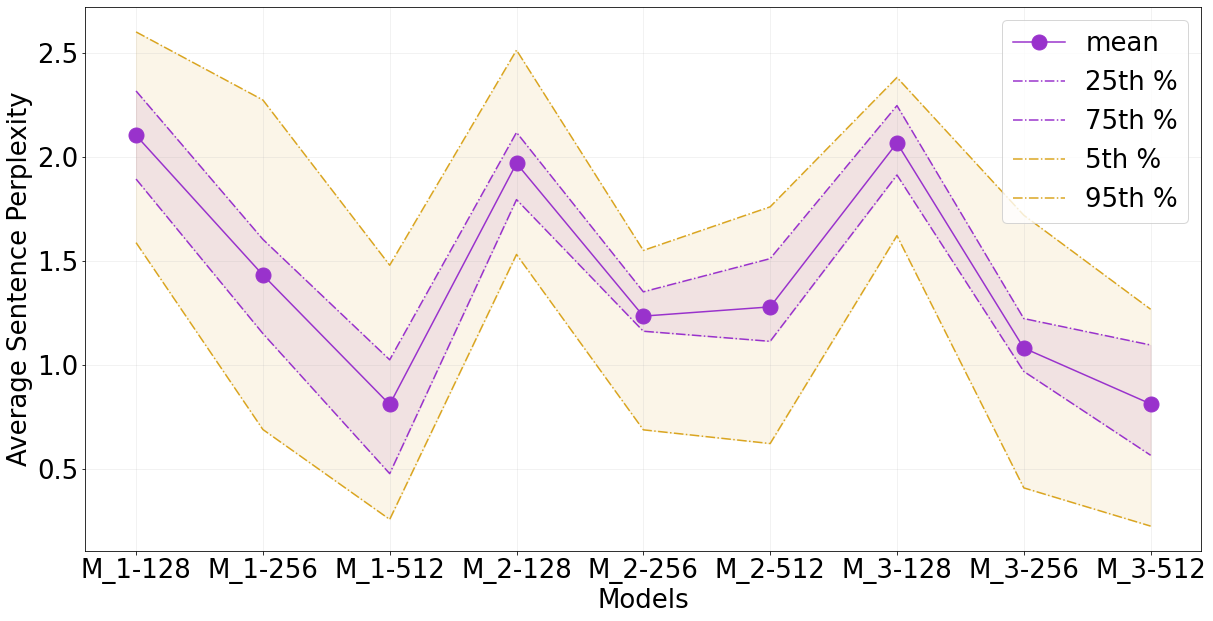

In [92]:
# source: https://towardsdatascience.com/the-matplotlib-line-plot-that-crushes-the-box-plot-912f8d2acd49


# Set the font size for all text on the plot
mpl.rcParams['font.size'] = 26

x = merged_df.index
y = merged_df.meanPP
y_low = merged_df.PP_25per
y_high = merged_df.PP_75per
y1_low = merged_df.PP_5per
y1_high = merged_df.PP_95per

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(x, y, color='darkorchid', marker='o', label='mean', markersize=15)
ax.plot(x, y_low, color='darkorchid', linestyle='-.', label='25th %')
ax.plot(x, y_high, color='darkorchid', linestyle='-.', label='75th %')
ax.plot(x, y1_low, color='goldenrod', linestyle='-.', label='5th %')
ax.plot(x, y1_high, color='goldenrod', linestyle='-.', label='95th %')
ax.legend()

ax.fill_between(x, y_low, y_high, alpha = .1, color = 'darkorchid')
ax.fill_between(x, y1_low, y1_high, alpha = .1, color = 'goldenrod')

ax.grid(alpha = .2, which='both') 
ax.set_ylabel('Average Sentence Perplexity', fontsize=26)
ax.set_xlabel('Models', fontsize=26)

plt.savefig("visual_graph.jpg", bbox_inches='tight')
plt.show()


